# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create empty lists and counters for record and set

city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
date_time = []
record_counter = 0
set_counter = 1

# Print initial output as shown

print("Beginning Data Retrieval")
print("-----------------------------")

# Construct query URL

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Create for loop

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        date_time.append(response["dt"])
        
        if record_counter > 48:
            record_counter = 0
            set_counter = set_counter + 1
        
        else:
            record_counter = record_counter + 1
        
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | isla vista
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | kariba
Processing Record 7 of Set 1 | usinsk
Processing Record 8 of Set 1 | klaksvik
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | meadow lake
Processing Record 15 of Set 1 | mabaruma
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | jamestown
City not found. Skipping...
Processing Record 

Processing Record 37 of Set 4 | puerto escondido
Processing Record 38 of Set 4 | fort nelson
City not found. Skipping...
Processing Record 39 of Set 4 | ilulissat
City not found. Skipping...
Processing Record 40 of Set 4 | shirokiy
Processing Record 41 of Set 4 | singarayakonda
Processing Record 42 of Set 4 | chunoyar
Processing Record 43 of Set 4 | lagonoy
Processing Record 44 of Set 4 | bud
Processing Record 45 of Set 4 | san martin
Processing Record 46 of Set 4 | provideniya
Processing Record 47 of Set 4 | cayenne
City not found. Skipping...
Processing Record 48 of Set 4 | ouahigouya
Processing Record 49 of Set 4 | semey
Processing Record 0 of Set 5 | yongchang
Processing Record 1 of Set 5 | san juan
Processing Record 2 of Set 5 | kysyl-syr
Processing Record 3 of Set 5 | mandalgovi
Processing Record 4 of Set 5 | sur
Processing Record 5 of Set 5 | alta floresta
Processing Record 6 of Set 5 | flin flon
Processing Record 7 of Set 5 | moron
Processing Record 8 of Set 5 | aban
Processing

Processing Record 24 of Set 8 | shingu
Processing Record 25 of Set 8 | samarai
Processing Record 26 of Set 8 | dudinka
Processing Record 27 of Set 8 | ilo
Processing Record 28 of Set 8 | kenai
Processing Record 29 of Set 8 | lazaro cardenas
Processing Record 30 of Set 8 | redlands
Processing Record 31 of Set 8 | ostrovnoy
Processing Record 32 of Set 8 | kropotkin
Processing Record 33 of Set 8 | atar
Processing Record 34 of Set 8 | singaraja
Processing Record 35 of Set 8 | porto novo
Processing Record 36 of Set 8 | san rafael del sur
Processing Record 37 of Set 8 | coihaique
Processing Record 38 of Set 8 | lavrentiya
Processing Record 39 of Set 8 | ust-tsilma
Processing Record 40 of Set 8 | whitehorse
Processing Record 41 of Set 8 | udachnyy
City not found. Skipping...
Processing Record 42 of Set 8 | lyuban
Processing Record 43 of Set 8 | buluang
Processing Record 44 of Set 8 | shenzhen
Processing Record 45 of Set 8 | cidreira
Processing Record 46 of Set 8 | oriximina
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create DataFrame

weather_df = pd.DataFrame({"City": city_name, "Lat": latitude, "Lng": longitude, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": countries, "Date": date_time})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-2.72,97,100,12.93,RU,1615732397
1,Saskylakh,71.9167,114.0833,-28.86,86,74,4.45,RU,1615732397
2,Isla Vista,34.4133,-119.8610,50.00,87,90,5.75,US,1615732398
3,Saint-François,46.4154,3.9054,50.00,53,75,17.27,FR,1615732398
4,Hilo,19.7297,-155.0900,69.80,83,90,4.61,US,1615732160
...,...,...,...,...,...,...,...,...,...
551,Pine Bluff,34.2284,-92.0032,60.80,88,90,8.05,US,1615732501
552,Jumla,29.2747,82.1838,44.87,79,4,4.14,NP,1615732561
553,Norwich,52.6278,1.2983,53.01,58,40,18.41,GB,1615732561
554,Guanare,9.0418,-69.7421,80.60,65,81,3.44,VE,1615732561


In [5]:
# Export DataFrame as .csv file

weather_df.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

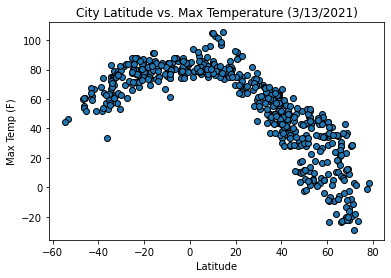

In [6]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor = "black")

# Title plot and label axes
plt.title("City Latitude vs. Max Temperature (3/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Max Temperature.png")

## Latitude vs. Humidity Plot

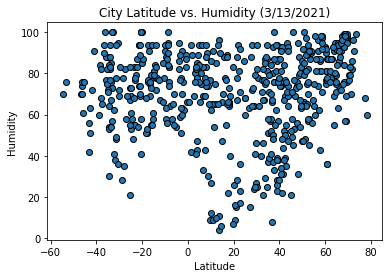

In [7]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolor = "black")

# Title plot and label axes
plt.title("City Latitude vs. Humidity (3/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

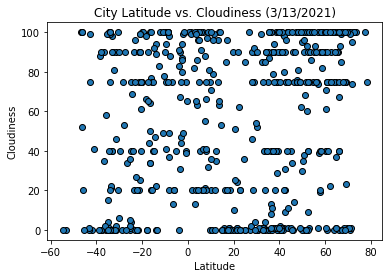

In [8]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor = "black")

# Title plot and label axes
plt.title("City Latitude vs. Cloudiness (3/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

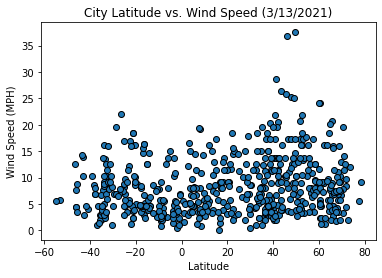

In [9]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor = "black")

# Title plot and label axes
plt.title("City Latitude vs. Wind Speed (3/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Wind Speed.png")

## Linear Regression

In [10]:
# Split data into Northern and Southern hemispheres

northern_hemisphere = weather_df.loc[weather_df["Lat"]>=0]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: -0.88


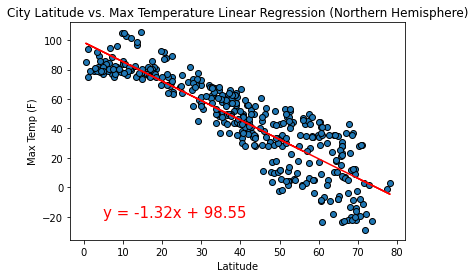

In [11]:
# Define x values and y values
x_values_1 = northern_hemisphere["Lat"]
y_values_1 = northern_hemisphere["Max Temp"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_1, y_values_1)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], edgecolor = "black")
plt.plot(x_values_1, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Max Temperature Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_eq,(5, -20),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Max Temp Linear Regression Northern Hemisphere.png")

There is a very strong negative correlation between latitude and maximum temperature for the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.69


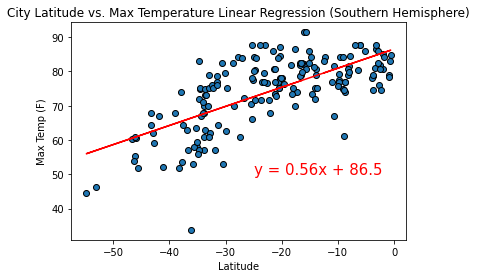

In [12]:
# Define x values and y values
x_values_2 = southern_hemisphere["Lat"]
y_values_2 = southern_hemisphere["Max Temp"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_2, y_values_2)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_2, y_values_2)
regress_values = x_values_2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], edgecolor = "black")
plt.plot(x_values_2, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Max Temperature Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_eq,(-25, 50),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Max Temp Linear Regression Southern Hemisphere.png")

There is a strong positive correlation between latitude and max temperature for the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.31


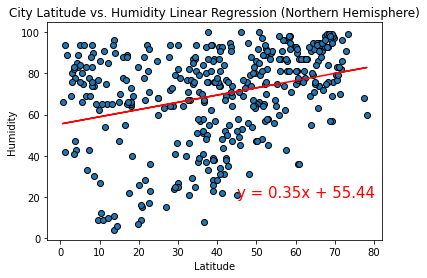

In [13]:
# Define x values and y values
x_values_3 = northern_hemisphere["Lat"]
y_values_3 = northern_hemisphere["Humidity"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_3, y_values_3)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_3, y_values_3)
regress_values = x_values_3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], edgecolor = "black")
plt.plot(x_values_3, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Humidity Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(45, 20),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Humidity Linear Regression Northern Hemisphere.png")

There is a weak positive correlation between city latitude and humidity for the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.11


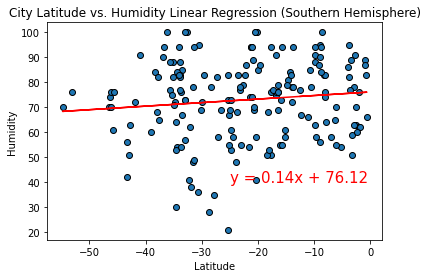

In [14]:
# Define x values and y values
x_values_4 = southern_hemisphere["Lat"]
y_values_4 = southern_hemisphere["Humidity"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_4, y_values_4)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_4, y_values_4)
regress_values = x_values_4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], edgecolor = "black")
plt.plot(x_values_4, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Humidity Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-25, 40),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Humidity Linear Regression Southern Hemisphere.png")

There is a very weak positive correlation between city latitude and humidity for the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.21


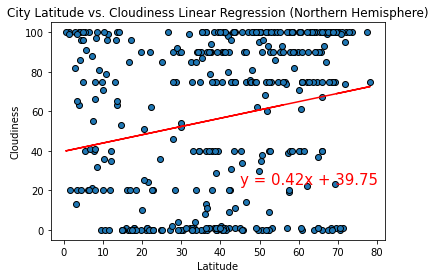

In [15]:
# Define x values and y values
x_values_5 = northern_hemisphere["Lat"]
y_values_5 = northern_hemisphere["Cloudiness"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_5, y_values_5)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_5, y_values_5)
regress_values = x_values_5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], edgecolor = "black")
plt.plot(x_values_5, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Cloudiness Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(45, 23),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Cloudiness Northern Hemisphere Linear Regression.png")

There is a weak positive correlation between city latitude and cloudiness for the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.28


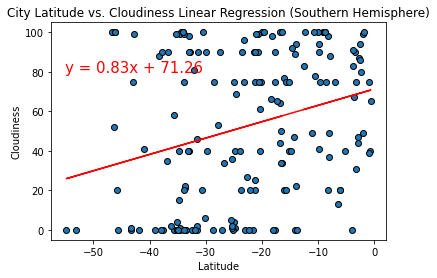

In [16]:
# Define x values and y values
x_values_6 = southern_hemisphere["Lat"]
y_values_6 = southern_hemisphere["Cloudiness"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_6, y_values_6)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_6, y_values_6)
regress_values = x_values_6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], edgecolor = "black")
plt.plot(x_values_6, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Cloudiness Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55, 80),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Cloudiness Southern Hemisphere Linear Regression.png")

There is a weak positive correlation between city latitude and cloudiness for the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.12


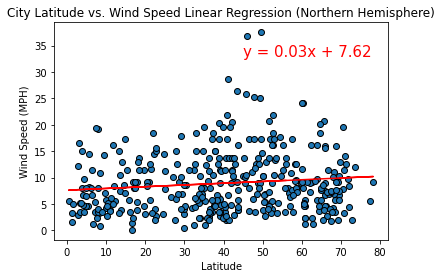

In [18]:
# Define x values and y values
x_values_7 = northern_hemisphere["Lat"]
y_values_7 = northern_hemisphere["Wind Speed"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_7, y_values_7)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_7, y_values_7)
regress_values = x_values_7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], edgecolor = "black")
plt.plot(x_values_7, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Wind Speed Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.annotate(line_eq,(45, 33),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Wind Speed Northern Hemisphere Linear Regression.png")

There is a very weak positive correlation between city latitude and wind speed for the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: -0.14


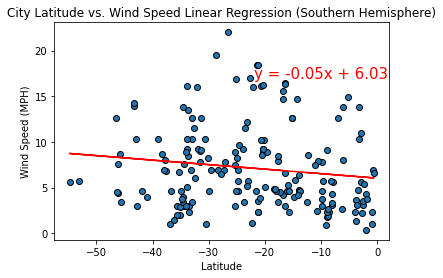

In [19]:
# Define x values and y values
x_values_8 = southern_hemisphere["Lat"]
y_values_8 = southern_hemisphere["Wind Speed"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_8, y_values_8)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_8, y_values_8)
regress_values = x_values_8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], edgecolor = "black")
plt.plot(x_values_8, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Wind Speed Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.annotate(line_eq,(-22, 17),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Wind Speed Southern Hemisphere Linear Regression.png")

There is a very weak negative correlation between city latitude and wind speed for the southern hemisphere.

### Three observable trends based on data

1. There is a very strong negative correlation between latitude and maximum temperature for the northern hemisphere. This is a logical trend-- the further away from the equator, the weather typically gets increasingly cooler.
2. There is a strong positive correlation between latitude and maximum temperature for the southern hemisphere. This is a logical trend-- the closer to the equator, the weather typically gets increasingly warmer.
3. Aside from the latitude vs. max temperature linear regression for both hemispheres, all other linear regressions revealed a weak or very weak correlation (latitude vs. humidity, cloudiness, and wind speed for both hemispheres).